In [1]:
# Developer's setting
%load_ext autoreload
%autoreload 2

In [2]:
import glaft
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
df = pd.read_csv('../manifest.csv', dtype=str)
in_shp = '/home/jovyan/Projects/PX_comparison/Bedrock_shp/glacier_V1_Kaskawulsh_s_inwardBuffer600m.shp'
selected_cases = df.loc[[64, 63, 99]]
selected_cases

,Date,Duration (days),Template size (px),Template size (m),Pixel spacing (px),Pixel spacing (m),Prefilter,Subpixel,Software,Vx,Vy
64,LS8-20180802-20180818,16,64,960,1,15,NAOF,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...
63,LS8-20180802-20180818,16,64,960,1,15,Gau,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...
99,LS8-20180802-20180818,16,65,975,1,15,Gau,parabolic,Vmap,/home/jovyan/Projects/PX_comparison/PX/Vmap/pa...,/home/jovyan/Projects/PX_comparison/PX/Vmap/pa...


In [4]:
exps = {}

for idx, row in selected_cases.iterrows():
    exp = glaft.Velocity(vxfile=row.Vx, vyfile=row.Vy, on_ice_area=in_shp, kde_gridsize=60, thres_sigma=2.0)
    exp.longitudinal_shear_analysis()
    exps[idx] = exp

Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running e

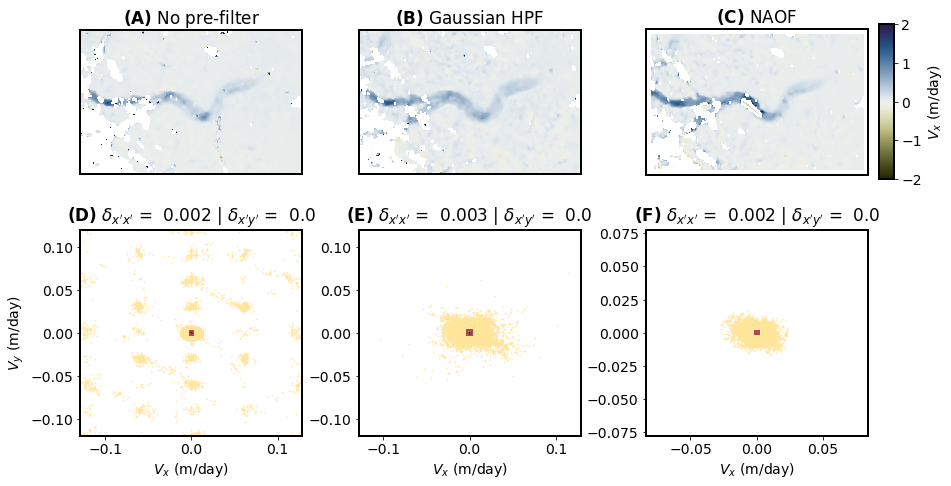

In [6]:
font = {'size'   : 14}
mpl.rc('font', **font)
axes_settings = {'linewidth'   : 2}
# axes_settings = {'linewidth'   : 2, 'labelsize': 14}
mpl.rc('axes', **axes_settings)

fig, axs = plt.subplots(2, 3, figsize=(13, 6.7), constrained_layout=True)

for idx, n, label, label2 in zip([64, 63, 99], 
                                 [0, 1, 2], 
                                 ['$\\bf{(A)}$ No pre-filter', '$\\bf{(B)}$ Gaussian HPF', '$\\bf{(C)}$ NAOF'], 
                                 ['$\\bf{(D)}$ ', '$\\bf{(E)}$ ', '$\\bf{(F)}$ ']):
    exp = exps[idx]
    ax_sel = axs[0, n]
    cm_settings = glaft.show_velocomp(exp.vxfile, ax=ax_sel)
    ax_sel.set_title(label)
    ax_sel = axs[1, n]
    exp.plot_zoomed_extent(metric=2, ax=ax_sel)
    ax_sel.axis('equal')
    ax_sel.set_xlim(-0.1, 0.1)
    ax_sel.set_ylim(-0.1, 0.1)
    ax_sel.set_xlabel('$V_x$ ({})'.format(exp.velocity_unit))
    metric_text = ax_sel.get_title()
    ax_sel.set_title(label2 + metric_text[:-8])

    
mappable = glaft.prep_colorbar_mappable(**cm_settings)
fig.colorbar(mappable, ax=[axs[0, 2]], location='right', shrink=0.75, aspect=10, label='$V_x$ ({})'.format(exp.velocity_unit))
axs[1, 0].set_ylabel('$V_y$ ({})'.format(exp.velocity_unit))

fig.patch.set_facecolor('xkcd:white')
# fig.savefig('Fig3.png', dpi=300)
# fig.savefig('Fig3.pdf')

In [11]:
exps[64].metric_alongflow_shear

0.002068524030083018

In [22]:
demo

Date                                              LS8-20180802-20180818
Duration (days)                                                      16
Template size (px)                                                   64
Template size (m)                                                   960
Pixel spacing (px)                                                    1
Pixel spacing (m)                                                    15
Prefilter                                                          NAOF
Subpixel                                           16-node oversampling
Software                                                          CARST
Vx                    /home/jovyan/Projects/PX_comparison/PX/CARST/2...
Vy                    /home/jovyan/Projects/PX_comparison/PX/CARST/2...
Name: 64, dtype: object

In [21]:
demo = df.loc[64]

tmpexp = glaft.Velocity(vxfile=demo.Vx, vyfile=demo.Vy, on_ice_area=in_shp, kde_gridsize=60, thres_sigma=2.0)
tmpexp.longitudinal_shear_analysis()
tmpexp.metric_alongflow_shear

Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric


0.0499868735364598

In [13]:
tmpexp.metric_alongflow_shear

0.002068524030083018

In [20]:
in_shp = '/home/jovyan/Projects/PX_comparison/Bedrock_shp/glacier_V1_Kaskawulsh_s_inwardBuffer600m.shp'

In [16]:
tmpexp.metric_alongflow_shear

0.0499868735364598

(-0.1, 0.1)

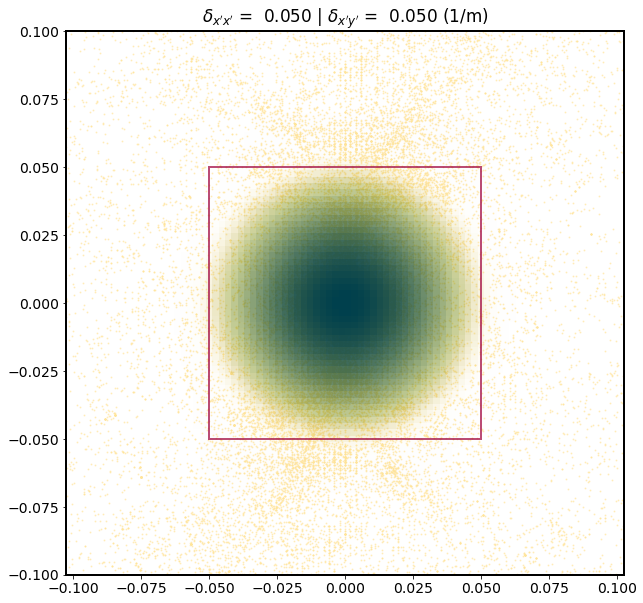

In [19]:
tmpexp.plot_zoomed_extent(metric=2)
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)

In [23]:
selected_cases

,Date,Duration (days),Template size (px),Template size (m),Pixel spacing (px),Pixel spacing (m),Prefilter,Subpixel,Software,Vx,Vy
64,LS8-20180802-20180818,16,64,960,1,15,NAOF,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...
63,LS8-20180802-20180818,16,64,960,1,15,Gau,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...
99,LS8-20180802-20180818,16,65,975,1,15,Gau,parabolic,Vmap,/home/jovyan/Projects/PX_comparison/PX/Vmap/pa...,/home/jovyan/Projects/PX_comparison/PX/Vmap/pa...


In [24]:
exps2 = {}

for idx, row in selected_cases.iterrows():
    exp2 = glaft.Velocity(vxfile=row.Vx, vyfile=row.Vy, on_ice_area=in_shp, kde_gridsize=60, thres_sigma=2.0)
    exp2.longitudinal_shear_analysis()
    exps2[idx] = exp2

Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running e

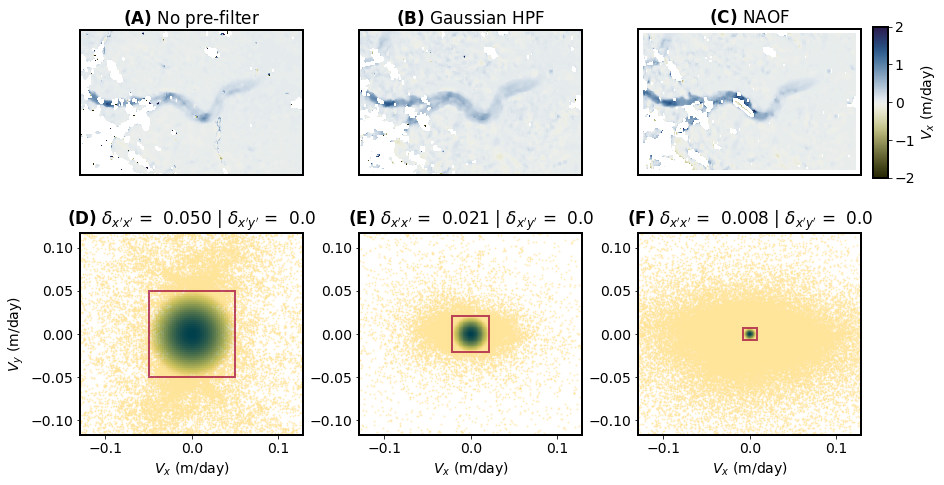

In [25]:
font = {'size'   : 14}
mpl.rc('font', **font)
axes_settings = {'linewidth'   : 2}
# axes_settings = {'linewidth'   : 2, 'labelsize': 14}
mpl.rc('axes', **axes_settings)

fig, axs = plt.subplots(2, 3, figsize=(13, 6.7), constrained_layout=True)

for idx, n, label, label2 in zip([64, 63, 99], 
                                 [0, 1, 2], 
                                 ['$\\bf{(A)}$ No pre-filter', '$\\bf{(B)}$ Gaussian HPF', '$\\bf{(C)}$ NAOF'], 
                                 ['$\\bf{(D)}$ ', '$\\bf{(E)}$ ', '$\\bf{(F)}$ ']):
    exp = exps2[idx]
    ax_sel = axs[0, n]
    cm_settings = glaft.show_velocomp(exp.vxfile, ax=ax_sel)
    ax_sel.set_title(label)
    ax_sel = axs[1, n]
    exp.plot_zoomed_extent(metric=2, ax=ax_sel)
    ax_sel.axis('equal')
    ax_sel.set_xlim(-0.1, 0.1)
    ax_sel.set_ylim(-0.1, 0.1)
    ax_sel.set_xlabel('$V_x$ ({})'.format(exp.velocity_unit))
    metric_text = ax_sel.get_title()
    ax_sel.set_title(label2 + metric_text[:-8])

    
mappable = glaft.prep_colorbar_mappable(**cm_settings)
fig.colorbar(mappable, ax=[axs[0, 2]], location='right', shrink=0.75, aspect=10, label='$V_x$ ({})'.format(exp.velocity_unit))
axs[1, 0].set_ylabel('$V_y$ ({})'.format(exp.velocity_unit))

fig.patch.set_facecolor('xkcd:white')
# fig.savefig('Fig3.png', dpi=300)
# fig.savefig('Fig3.pdf')